**Downloading the datasets**

In this application cifar10 dataset has been used

In [3]:
!bash get_datasets.sh

--2020-12-03 12:41:32--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162,60M  1,17MB/s    in 2m 21s  

2020-12-03 12:43:54 (1,15 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


**Import python built-in and custom modules**

In [22]:
import random
import numpy as np
from   data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

**Loading CIFAR10 datasets**

In [24]:
# Load the raw CIFAR-10 data
cifar10_dir = 'cifar-10-batches-py'
    
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

Clear previously loaded data.


In [11]:
# To import the cifar10 dataset from tensorflow keras datasets
#X_train, y_train, X_test, y_test = tf.keras.datasets.cifar10.load_data()

**Adjust the figure size**

In [25]:
plt.figure(figsize=(10.0,8.0))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

**To vizualize some example images from our dataset**

In [26]:
def plot_samples(classes, sample_per_class):
    num_class = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, sample_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i*num_class + y + 1      
            plt.subplot(sample_per_class, num_class, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i==0:
                plt.title(cls)
    
    plt.show()

**Define classes and plot examples**

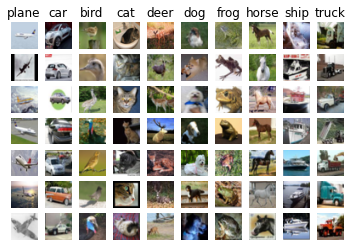

In [27]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_samples(classes, 7)

**Making the data preprocessing**

In [28]:
# reshaping

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test  = np.reshape(X_test, (X_test.shape[0], -1))

# Normalize the data: subtract the mean image

mean_image = np.mean(X_train, axis = 0)

X_train -= mean_image
X_test  -= mean_image

**Vizualize mean image**

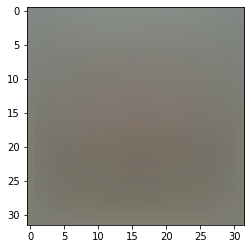

In [29]:
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))

**Reshaping images to initial shape**

In [30]:
X_train = np.reshape(X_train,(50000,32,32,3))
X_test  = np.reshape(X_test,(10000,32,32,3))

**Normalize the data: scale between  [-1 1]**

In [31]:
X_train /= 128
X_test  /= 128

**One Hot Encoding**

In [32]:
from tensorflow import keras

y_train_categorital = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test_categorital = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [33]:
y_train_categorital[:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Building ANN and CNN models**

In [34]:
def getmodel(nn='ANN'):
    if(nn=='ANN'):
        model = keras.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000, activation='relu'),
            keras.layers.Dropout(0.5),
            layers.Dense(1000, activation='relu'),
            keras.layers.Dropout(0.5),
            layers.Dense(300, activation='relu'),
            keras.layers.Dropout(0.5),
            layers.Dense(10, activation='sigmoid')
        ]) 

        model.compile(
            optimizer='SGD',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
    elif(nn=='CNN'):
        model = models.Sequential([
            # Conv + Pooling
            layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)),
            layers.MaxPool2D((2,2)),
            
            layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)),
            layers.MaxPool2D((2,2)),
            
            #dense
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')            
        ])
        
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
    elif(nn=='CNN2'):
        model = models.Sequential([
            # Conv + Pooling
            layers.Conv2D(filters=32, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)),
            layers.MaxPool2D((2,2)),
            
            layers.Conv2D(filters=32, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)),
            layers.MaxPool2D((2,2)),
            
            #dense
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')            
        ])
        
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
    
    return model

**Test for GPU and CPU physical device availability**

In [38]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [23]:
with tf.device('/GPU:0'):
    modelANN = getmodel('ANN')
    modelANN.fit(X_train, y_train_categorital,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 52s 33ms/step - loss: 2.0552 - accuracy: 0.2475
Epoch 2/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.8461 - accuracy: 0.3368
Epoch 3/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.7538 - accuracy: 0.3724
Epoch 4/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6873 - accuracy: 0.3954
Epoch 5/20
1563/1563 [==============================] - 49s 32ms/step - loss: 1.6370 - accuracy: 0.4155
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5905 - accuracy: 0.43390s - loss: 1.5907 - accura
Epoch 7/20
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5584 - accuracy: 0.4448
Epoch 8/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5260 - accuracy: 0.4571
Epoch 9/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5020 - accuracy: 0.4660
Epoch 10/20
1563/1563 [===============

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_ann = modelANN.predict(X_test)
y_pred_classes_ann = [np.argmax(i) for i in y_pred_ann]

print('Classification report: \n',classification_report(y_test,y_pred_classes_ann))

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      1000
           1       0.67      0.66      0.66      1000
           2       0.44      0.36      0.40      1000
           3       0.41      0.25      0.31      1000
           4       0.44      0.47      0.46      1000
           5       0.47      0.43      0.45      1000
           6       0.44      0.76      0.56      1000
           7       0.70      0.57      0.63      1000
           8       0.59      0.74      0.66      1000
           9       0.62      0.55      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



Text(69.0, 0.5, 'Truth')

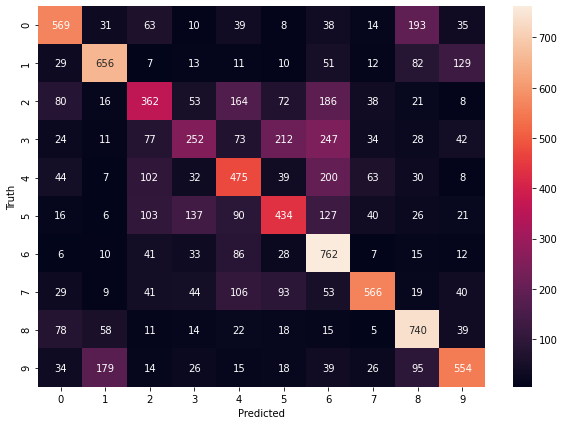

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes_ann)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
with tf.device('/GPU:0'):
    modelCNN = getmodel('CNN')
    modelCNN.fit(X_train, y_train_categorital,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4097 - accuracy: 0.4957
Epoch 2/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0768 - accuracy: 0.6210
Epoch 3/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9485 - accuracy: 0.6706
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8674 - accuracy: 0.6987
Epoch 5/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8075 - accuracy: 0.7173
Epoch 6/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7617 - accuracy: 0.7341
Epoch 7/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7172 - accuracy: 0.7487
Epoch 8/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6774 - accuracy: 0.7625
Epoch 9/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6416 - accuracy: 0.7760
Epoch 10/100
1563/1563 [==============================]

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_cnn = modelCNN.predict(X_test)
y_pred_classes_cnn = [np.argmax(i) for i in y_pred_cnn]

print('Classification report: \n',classification_report(y_test,y_pred_classes_cnn))

Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.80      0.76      0.78      1000
           2       0.52      0.53      0.52      1000
           3       0.44      0.43      0.43      1000
           4       0.59      0.60      0.60      1000
           5       0.55      0.55      0.55      1000
           6       0.72      0.72      0.72      1000
           7       0.67      0.69      0.68      1000
           8       0.79      0.77      0.78      1000
           9       0.72      0.76      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



Text(69.0, 0.5, 'Truth')

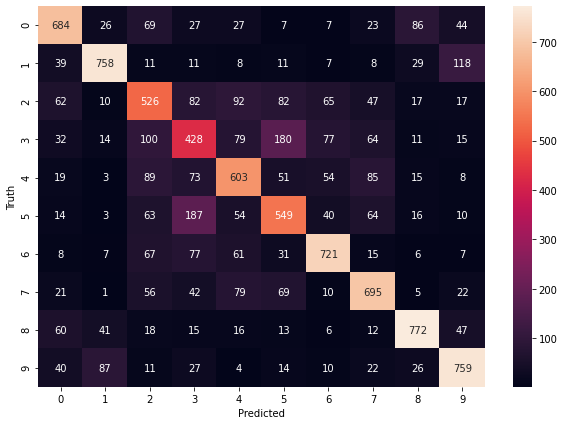

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes_cnn)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
with tf.device('/GPU:0'):
    modelCNN2 = getmodel('CNN2')
    modelCNN2.fit(X_train, y_train_categorital,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3395 - accuracy: 0.5240
Epoch 2/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0154 - accuracy: 0.6444
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8929 - accuracy: 0.6867
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8174 - accuracy: 0.7142
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7583 - accuracy: 0.7343
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7117 - accuracy: 0.7503
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6648 - accuracy: 0.7671
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6235 - accuracy: 0.7816
Epoch 9/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5865 - accuracy: 0.7923
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step -

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_cnn2 = modelCNN2.predict(X_test)
y_pred_classes_cnn2 = [np.argmax(i) for i in y_pred_cnn2]

print('Classification report: \n',classification_report(y_test,y_pred_classes_cnn2))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.66      0.69      1000
           1       0.83      0.72      0.77      1000
           2       0.52      0.54      0.53      1000
           3       0.43      0.52      0.47      1000
           4       0.59      0.64      0.61      1000
           5       0.53      0.52      0.53      1000
           6       0.73      0.72      0.72      1000
           7       0.75      0.67      0.71      1000
           8       0.75      0.79      0.77      1000
           9       0.75      0.74      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



Text(69.0, 0.5, 'Truth')

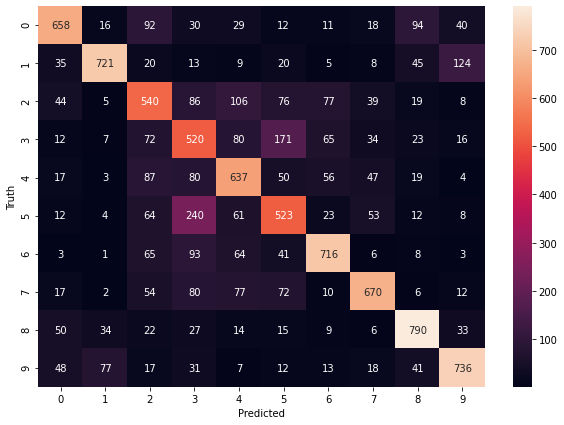

In [27]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes_cnn2)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')